# Lesson
We'll understand about torch.nn, the torch library with every block to build a NN

In [1]:
import torch
from torch import nn

import matplotlib.pyplot as plt

torch.__version__

/home/operador/Documentos/Estudos/Projetos/Python Studies/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:63: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


'2.8.0+cu128'

## Preparing Data
There is a lot of kind of data, and off course you'll need prepar it before use it in any model.

Here is the steps:
1. Get some data.
2. Clean it.
3. Transform the data in numerical.
4. Build a model to learn patterns from this numerical data.

We'll use a linear regression function to make straight line with known __parameters__.

In [2]:
weight = 0.7
bias = 0.3


start = 0
end = 1
step = 0.02

In [3]:
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias # Simple weight by value

train_split = int(0.8 * len(X))

# Separando os dados
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [4]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [5]:
print(f"""
    Valores de X: {X[:4]}...\n
    Valores de y: {y[:4]}...
""")


    Valores de X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600]])...

    Valores de y: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420]])...



## How can we visualize our data?

In [6]:
def plot_prediction(
        train_data=X_train,
        train_labels=y_train,
        test_data=X_test,
        test_labels=y_test,
        predictions=None
):
    """
        Plot the graphs of the data
    """
    plt.figure(figsize=(7, 4))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

    if predictions != None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

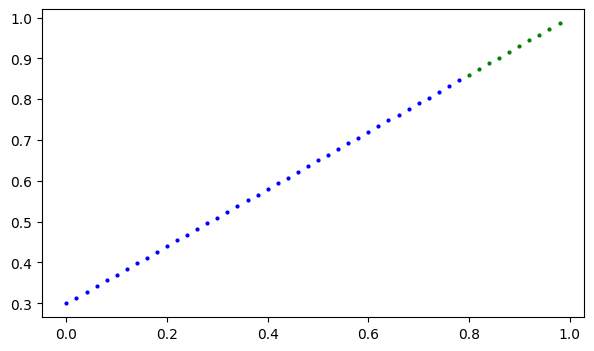

In [7]:
plot_prediction(X_train, y_train, X_test, y_test)

## Creating ANN class
We gonna create a simple ANN model to show the basics about it with torch

We'll use:
- Gradient Descent
    - The loss function is defined by this function, with more precision and lower cost.
- Backpropagation
    - The weight of the nodes are automatically manipulated

In [8]:
# Creating the class using the Module
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        # Parameter defines a kind of tensor considerated by nn.Module
        self.weights = nn.Parameter(torch.rand(1,
                                               requires_grad=True, # <- Setting the gradient-descent
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1,
                                               requires_grad=True, # <- Setting the gradient-descent
                                               dtype=torch.float))
        
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.weights * X + self.bias

### Essencials about
- torch.nn - Contains all of the buildings to computational graphs
- torch.nn.Parameter - What parameters should our model try and learn
- torch.nn.Module - The base class for all network modules, if you subclass it, you should overwire forward()
- torch.optim - This where the optimizer in PyTorch live, they will help with gradient descent
- def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

In [9]:
# We'll set a seed to have the same value in all executions
torch.manual_seed(42)

model0 = NeuralNetwork()
list(model0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [10]:
# Showing the parameter name and value
model0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

### Doing Predictions

In [11]:
for i in range(len(X_test)):
    print(f"{float(X_test[i]):.7f} : {float(y_test[i]):.7f}")

0.8000000 : 0.8600000
0.8200000 : 0.8740000
0.8400000 : 0.8880000
0.8600000 : 0.9020000
0.8800000 : 0.9160000
0.9000000 : 0.9300000
0.9200000 : 0.9440000
0.9400000 : 0.9580000
0.9600000 : 0.9720000
0.9800000 : 0.9860000


In [12]:
with torch.inference_mode():
    y_preds = model0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

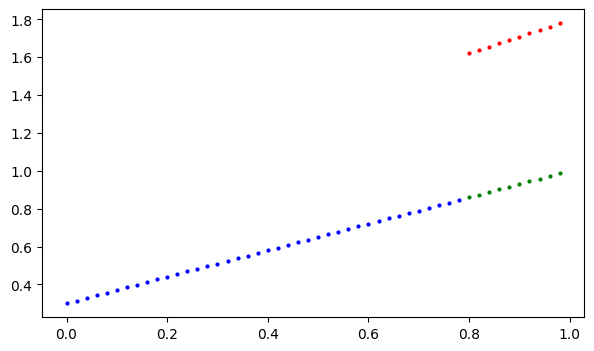

In [13]:
# Verifing the prediction, it's the red one
plot_prediction(predictions=y_preds)

### Loss Function
To improve the model and figure out how much wrong it was, we need use a loss function. Like MSE, and we need to change the weights and bias based in this loss / error.\
$MSE = \frac{ \sum{ \sqrt{x_i - y)²}} }{n} $

In [14]:
model0.state_dict()['weights']

tensor([0.8823])

In [15]:
print(f"Weights: {float(model0.state_dict()["weights"]):.2f}\nTarget: {y.mean():.2f}")

Weights: 0.88
Target: 0.64


In [16]:
# This is the loss function, it made the MSE calculus to check the "distance" from y

loss = nn.L1Loss()
output = loss(model0.weights, y)
output.backward()

# This is the value of the MSE, 0,2393 I calculate manually.
output

/home/operador/Documentos/Estudos/Projetos/Python Studies/.venv/lib/python3.12/site-packages/torch/nn/modules/loss.py:129: UserWarning: Using a target size (torch.Size([50, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


tensor(0.2568, grad_fn=<MeanBackward0>)

In [ ]:
from torch.optim import SGD

optimizer_fc = SGD(model0.parameters(), lr=0.01, momentum=0.9)
loss_fc = nn.L1Loss()

# 30 Epochs is the best number
epoch = 30

In [37]:
for e in range(epoch):

    y_pred = model0(X_train)
    optimizer_fc.zero_grad()

    loss = loss_fc(y_pred, y_train)

    loss.backward()
    optimizer_fc.step()

    print(f"Epoch: {e + 1}/{epoch}")
    print(f"Out: {loss}")

Epoch: 1/30
Out: 0.002114995615556836
Epoch: 2/30
Out: 0.009405992925167084
Epoch: 3/30
Out: 0.008253908716142178
Epoch: 4/30
Out: 0.004303971771150827
Epoch: 5/30
Out: 0.00408508162945509
Epoch: 6/30
Out: 0.007632918655872345
Epoch: 7/30
Out: 0.00665814196690917
Epoch: 8/30
Out: 0.0057401834055781364
Epoch: 9/30
Out: 0.005377680063247681
Epoch: 10/30
Out: 0.00646959850564599
Epoch: 11/30
Out: 0.005611162632703781
Epoch: 12/30
Out: 0.00668244669213891
Epoch: 13/30
Out: 0.006225683726370335
Epoch: 14/30
Out: 0.005706402473151684
Epoch: 15/30
Out: 0.004924274981021881
Epoch: 16/30
Out: 0.007300656288862228
Epoch: 17/30
Out: 0.006782087497413158
Epoch: 18/30
Out: 0.005205622408539057
Epoch: 19/30
Out: 0.004473556764423847
Epoch: 20/30
Out: 0.007706298027187586
Epoch: 21/30
Out: 0.007147160358726978
Epoch: 22/30
Out: 0.004877049475908279
Epoch: 23/30
Out: 0.00417784508317709
Epoch: 24/30
Out: 0.00797243881970644
Epoch: 25/30
Out: 0.007386674173176289
Epoch: 26/30
Out: 0.0046614957973361015

In [50]:
with torch.inference_mode():
    final_pred = model0(X_test)

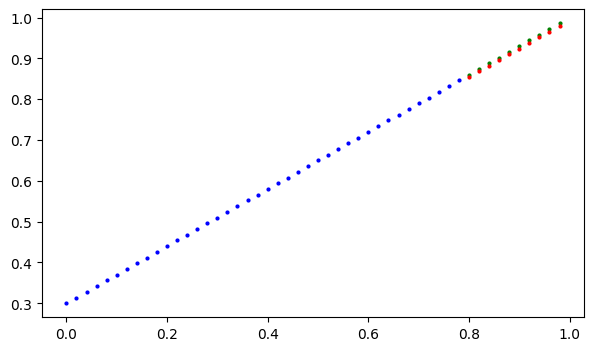

In [ ]:
# This is the final result of the model
plot_prediction(predictions=final_pred)

## Precision

In [ ]:
loss = nn.L1Loss()
output = loss(final_pred, X_test)

# Final MSE result for the prediction
output

tensor(0.0271)